## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
# Import required libraries and dependencies

import pandas as pd
from pathlib import Path
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path("./Resources/bitstamp.csv"), 
    index_col="Timestamp",
    infer_datetime_format=True,
    parse_dates=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    infer_datetime_format=True,
    parse_dates=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp_df.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [8]:
# Based on the bitstamp_df.isnull().mean() code, there is not a large percent of the data missing. 
# Therefore, it is okay to drop the missing data.
bitstamp_df = bitstamp_df.dropna()
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")
bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Step 1: Check for missing data and remove or replace it.
coinbase_df.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [13]:
coinbase_df.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [14]:
# Based on the coinbase_df.isnull().mean() code, there is not a large percent of the data missing. 
# Therefore, it is okay to drop the missing data.
coinbase_df = coinbase_df.dropna()
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [15]:
# Step 2: Use the str.replace function to remove the dollar sign, $
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].str.replace("$", "")
coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [16]:
# Step 3: Convert the Close data type to a float 
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].astype("float")
coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [17]:
# Review the data for duplicate values, and drop them if necessary
coinbase_df.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.iloc[:, 3]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.iloc[:, 3]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [20]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [21]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

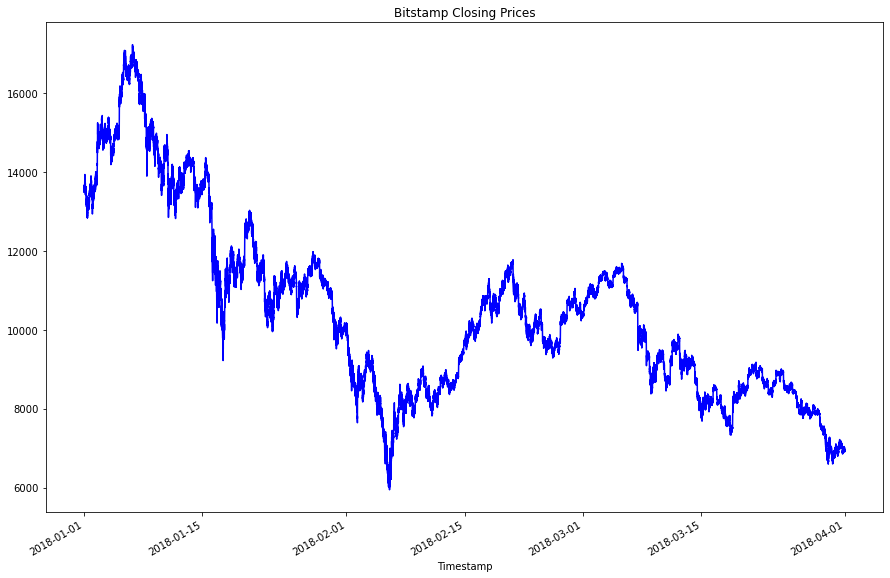

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15,10), title="Bitstamp Closing Prices", color="blue")

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

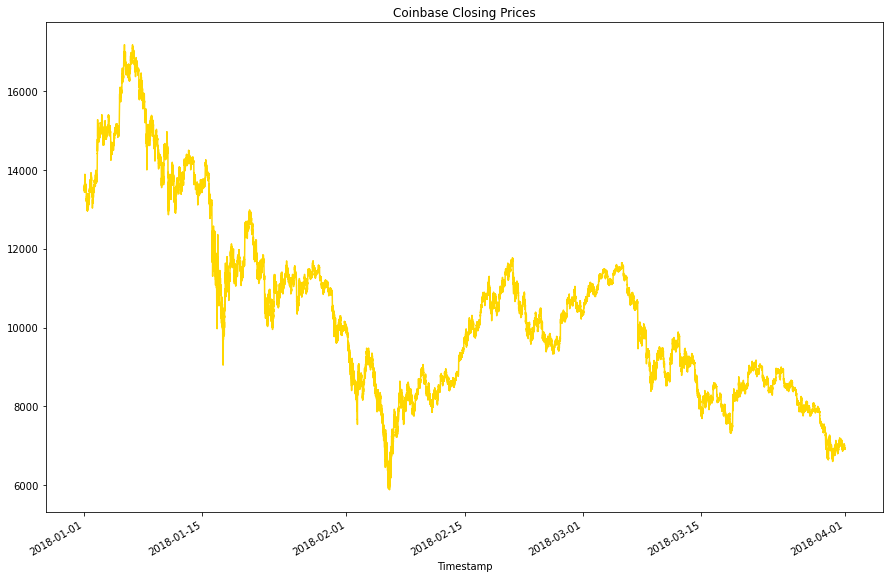

In [23]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15,10), title="Coinbase Closing Prices", color="gold")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase Closing Prices'}, xlabel='Timestamp', ylabel='Closing Prices'>

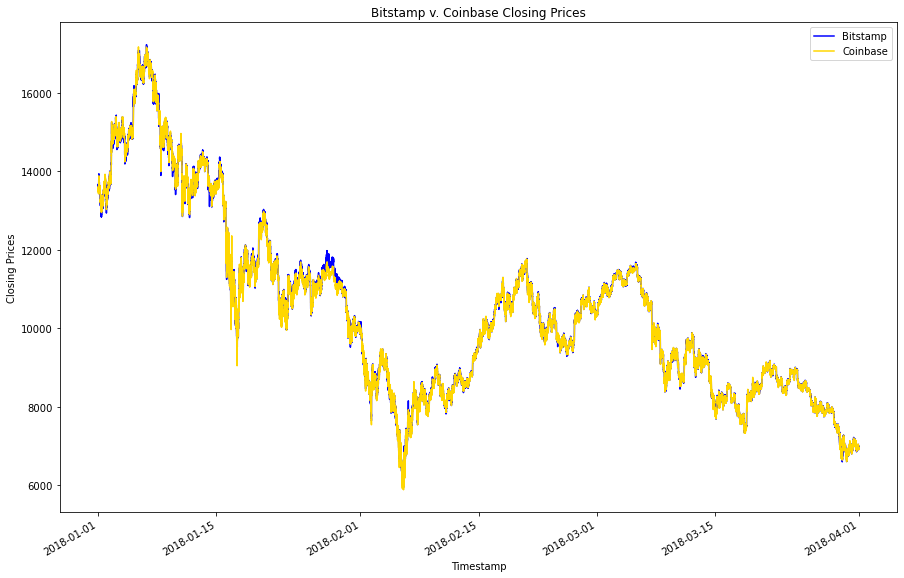

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, color, and label 
bitstamp_sliced.plot(
    xlabel="Timestamp", ylabel="Closing Prices", legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase Closing Prices", color="blue", label="Bitstamp")
coinbase_sliced.plot(
    xlabel="Timestamp", ylabel="Closing Prices", legend=True, figsize=(15, 10), color="gold", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase January Prices'}, xlabel='Timestamp'>

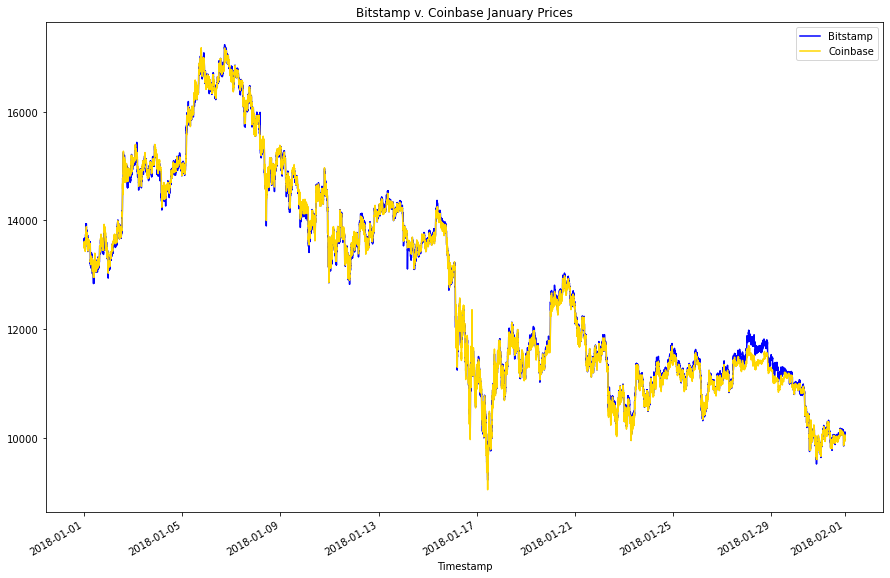

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_df.loc["2018-01-01":"2018-01-31", "Close"].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase January Prices", color="blue", label="Bitstamp")
coinbase_df.loc["2018-01-01":"2018-01-31", "Close"].plot(
    legend=True, figsize=(15, 10), color="gold", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase March Prices'}, xlabel='Timestamp'>

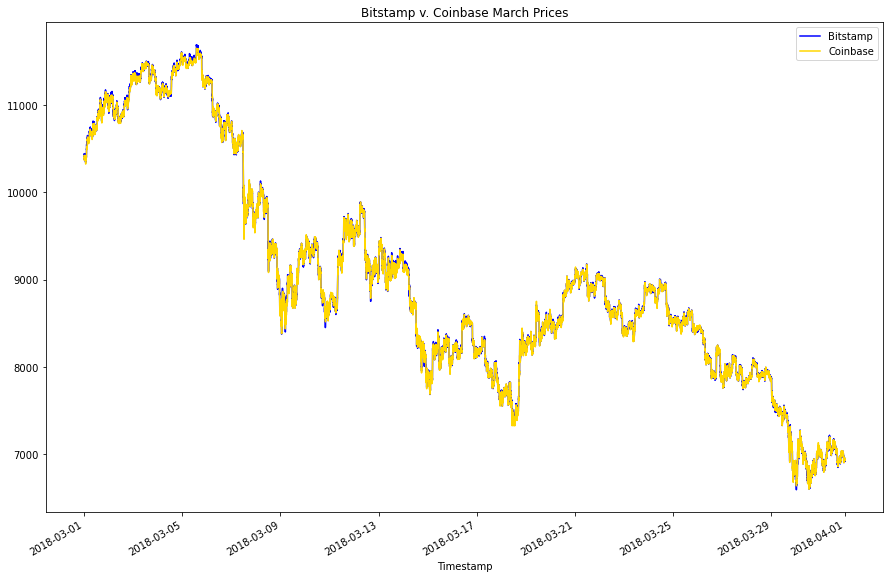

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_df.loc["2018-03-01":"2018-03-31", "Close"].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase March Prices", color="blue", label="Bitstamp")
coinbase_df.loc["2018-03-01":"2018-03-31", "Close"].plot(
    legend=True, figsize=(15, 10), color="gold", label="Coinbase")

In [27]:
# Check the summary statistics for January to confirm what the graph shows about the spread.
display(bitstamp_df.loc["2018-01-01":"2018-01-31", "Close"].describe())

display(coinbase_df.loc["2018-01-01":"2018-01-31", "Close"].describe())

count    44536.000000
mean     12872.410347
std       1926.531347
min       9222.000000
25%      11223.337500
50%      12678.020000
75%      14354.482500
max      17234.980000
Name: Close, dtype: float64

count    44619.000000
mean     12853.529106
std       1947.377305
min       9045.610000
25%      11172.855000
50%      12626.150000
75%      14345.010000
max      17177.990000
Name: Close, dtype: float64

In [28]:
# Check the summary statistics for March to confirm what the graph shows about the spread.
display(bitstamp_df.loc["2018-03-01":"2018-03-31", "Close"].describe())

display(coinbase_df.loc["2018-03-01":"2018-03-31", "Close"].describe())

count    44295.000000
mean      9003.946775
std       1275.114083
min       6594.240000
25%       8143.750000
50%       8721.370000
75%       9642.080000
max      11687.460000
Name: Close, dtype: float64

count    44573.000000
mean      9001.760496
std       1273.424285
min       6600.010000
25%       8140.000000
50%       8723.080000
75%       9634.990000
max      11644.000000
Name: Close, dtype: float64

**Question** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer** The visualizations of the different time periods show that the degree of spread got smaller (less spread out) as time progressed. Bitstamp and coinbase moved closer together as there is less blue color (bitstamp) peaking out from the yellow color (coinbase) as time progressed. In January, the coinbase standard deviation (SD) was 1947 and bitstamp SD was 1926 (1947-1926 = 21). In March, the bitstamp SD was 1275 and the coinbase SD was 1273 (1275-1273 = 2). Therefore, 21 is much greater than 2, so they were more spread from each other in January compared to March. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase on January 28, 2018 (Early Price)'}, xlabel='Timestamp'>

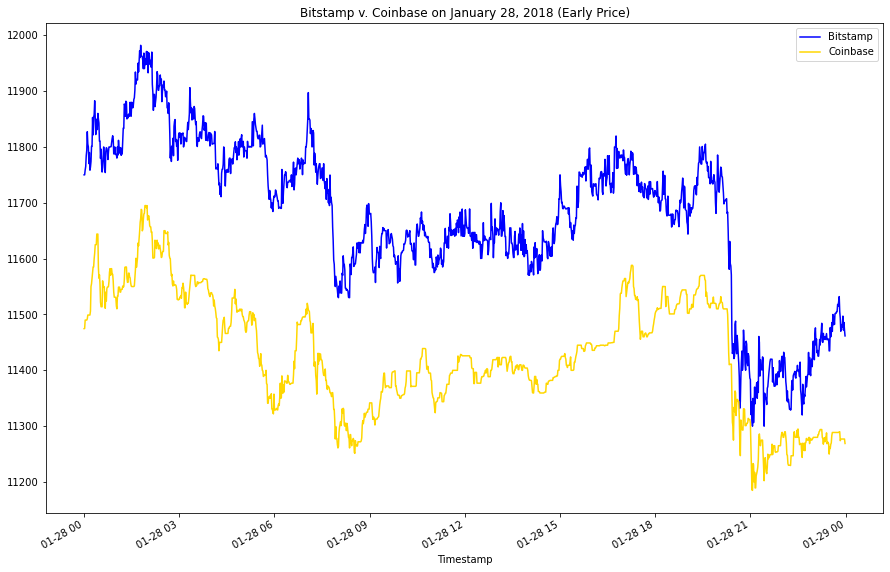

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-01-28", "Close"].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase on January 28, 2018 (Early Price)", color="blue", label="Bitstamp")
coinbase_df.loc["2018-01-28", "Close"].plot(
    legend=True, figsize=(15, 10), color="gold", label="Coinbase")

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_df["2018-01-28"]["High"] - coinbase_df["2018-01-28"]["Low"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      264.780557
std        66.933691
min        87.990000
25%       225.330000
50%       268.420000
75%       307.082500
max       458.160000
dtype: float64

<AxesSubplot:title={'center':'Early Arbitrage Spread'}>

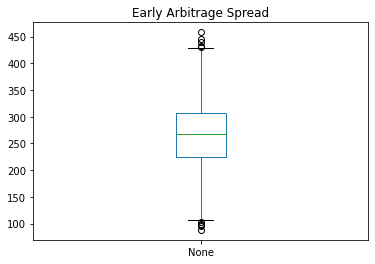

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title="Early Arbitrage Spread")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase on February 20, 2018 (Middle Price)'}, xlabel='Timestamp'>

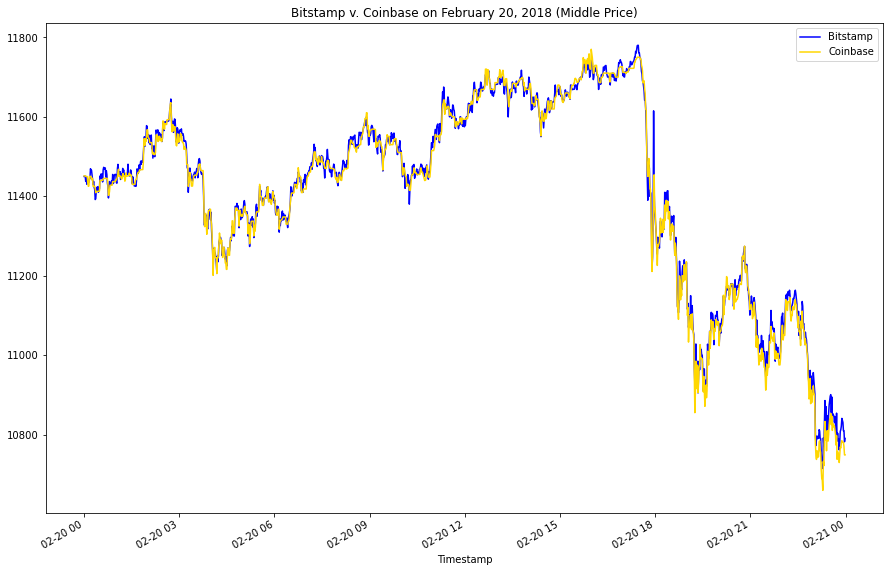

In [70]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-02-20", "Close"].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase on February 20, 2018 (Middle Price)", color="blue", label="Bitstamp")
coinbase_df.loc["2018-02-20", "Close"].plot(
    legend=True, figsize=(15, 10), color="gold", label="Coinbase")

In [72]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_df["2018-02-20"]["High"] - coinbase_df["2018-02-20"]["Low"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1439.000000
mean       25.930368
std        26.010265
min       -15.950000
25%        10.395000
50%        20.050000
75%        33.915000
max       286.160000
dtype: float64

<AxesSubplot:title={'center':'Middle Arbitrage Spread'}, ylabel='Difference in Closing Prices'>

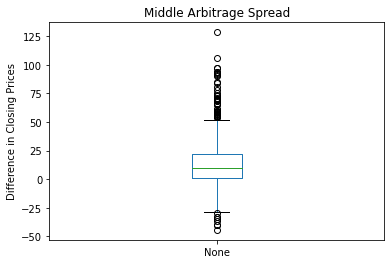

In [61]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title="Middle Arbitrage Spread", ylabel="Difference in Closing Prices")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase on March 30, 2018 (Late Price)'}, xlabel='Timestamp'>

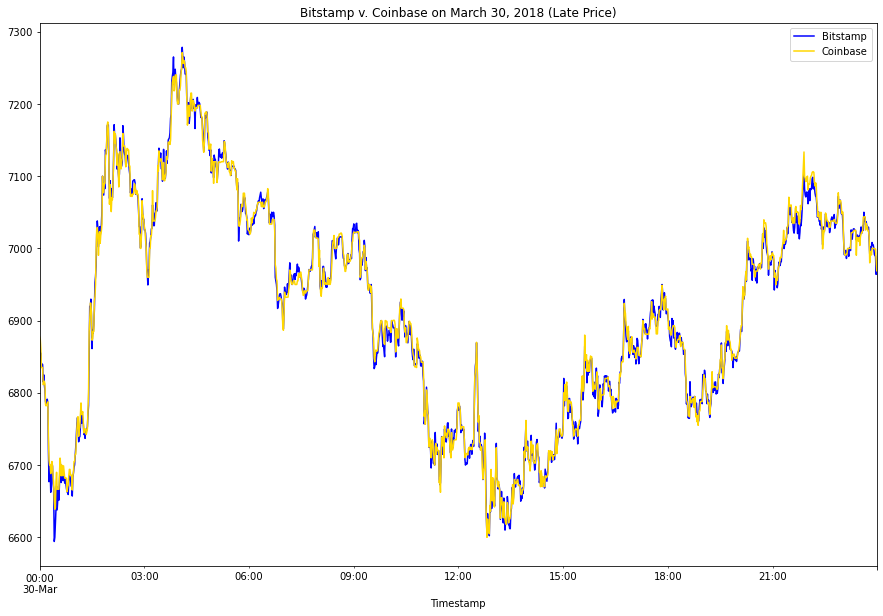

In [73]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_df.loc["2018-03-30", "Close"].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase on March 30, 2018 (Late Price)", color="blue", label="Bitstamp")
coinbase_df.loc["2018-03-30", "Close"].plot(
    legend=True, figsize=(15, 10), color="gold", label="Coinbase")

In [74]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_df["2018-03-30"]["High"] - bitstamp_df["2018-03-30"]["Low"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       16.731896
std        14.381945
min       -15.470000
25%         7.642500
50%        14.380000
75%        23.190000
max       116.130000
dtype: float64

<AxesSubplot:title={'center':'Late Arbitrage Spread'}>

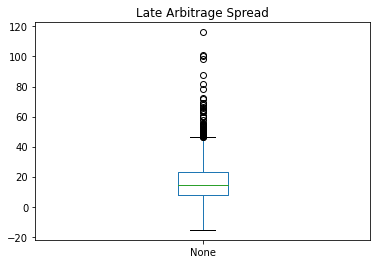

In [75]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title="Late Arbitrage Spread")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [76]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = bitstamp_df["2018-01-28"]["High"] - coinbase_df["2018-01-28"]["Low"]
arbitrage_spread_middle = bitstamp_df["2018-02-20"]["High"] - coinbase_df["2018-02-20"]["Low"]
arbitrage_spread_late = coinbase_df["2018-03-30"]["High"] - bitstamp_df["2018-03-30"]["Low"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_early = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_late = arbitrage_spread_late[arbitrage_spread_late > 0]

display(arbitrage_early.describe())
display(arbitrage_middle.describe())
display(arbitrage_late.describe())


count    1436.000000
mean      264.780557
std        66.933691
min        87.990000
25%       225.330000
50%       268.420000
75%       307.082500
max       458.160000
dtype: float64

count    1319.000000
mean       28.785466
std        25.271503
min         0.010000
25%        12.885000
50%        22.060000
75%        35.850000
max       286.160000
dtype: float64

count    1343.000000
mean       18.223574
std        13.714590
min         0.010000
25%         9.135000
50%        15.090000
75%        24.020000
max       116.130000
dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [77]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase_df["Low"].loc["2018-01-28"]
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_df["Low"].loc["2018-02-20"]
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_df["Low"].loc["2018-03-30"]

# Review the spread return DataFrame
display(spread_return_early.describe())
display(spread_return_middle.describe())
display(spread_return_late.describe())

count    1436.000000
mean        0.023163
std         0.005834
min         0.007778
25%         0.019624
50%         0.023380
75%         0.026774
max         0.040228
dtype: float64

count    1.319000e+03
mean     2.562558e-03
std      2.304760e-03
min      8.547016e-07
25%      1.129623e-03
50%      1.909812e-03
75%      3.154150e-03
max      2.525943e-02
dtype: float64

count    1343.000000
mean        0.002651
std         0.002016
min         0.000001
25%         0.001330
50%         0.002194
75%         0.003475
max         0.017653
dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [78]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())



Timestamp
2018-01-28 00:00:00    0.024783
2018-01-28 00:01:00    0.024000
2018-01-28 00:02:00    0.024828
2018-01-28 00:03:00    0.024223
2018-01-28 00:04:00    0.025664
dtype: float64

Timestamp
2018-02-20 17:53:00    0.013085
2018-02-20 17:57:00    0.025259
2018-02-20 17:58:00    0.022358
2018-02-20 17:59:00    0.011776
2018-02-20 18:44:00    0.011502
dtype: float64

Timestamp
2018-03-30 00:18:00    0.010156
2018-03-30 00:25:00    0.012420
2018-03-30 00:26:00    0.015443
2018-03-30 00:28:00    0.017653
2018-03-30 00:30:00    0.014899
dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [79]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())


count    1427.000000
mean        0.023252
std         0.005743
min         0.010123
25%         0.019726
50%         0.023416
75%         0.026812
max         0.040228
dtype: float64

count    15.000000
mean      0.013867
std       0.004159
min       0.010884
25%       0.011689
50%       0.012510
75%       0.013389
max       0.025259
dtype: float64

count    10.000000
mean      0.013053
std       0.002543
min       0.010156
25%       0.010941
50%       0.012615
75%       0.014879
max       0.017653
dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [80]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_df["Low"].loc["2018-01-28"]
profit_middle = profitable_trades_middle * coinbase_df["Low"].loc["2018-02-20"]
profit_late = profitable_trades_late * bitstamp_df["Low"].loc["2018-03-30"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
display(profit_per_trade_early.head())
display(profit_per_trade_middle.head())
display(profit_per_trade_late.head())

Timestamp
2018-01-28 00:00:00    284.38
2018-01-28 00:01:00    275.39
2018-01-28 00:02:00    284.90
2018-01-28 00:03:00    278.32
2018-01-28 00:04:00    294.88
dtype: float64

Timestamp
2018-02-20 17:53:00    147.32
2018-02-20 17:57:00    286.16
2018-02-20 17:58:00    254.01
2018-02-20 17:59:00    133.78
2018-02-20 18:44:00    126.52
dtype: float64

Timestamp
2018-03-30 00:18:00     67.36
2018-03-30 00:25:00     81.90
2018-03-30 00:26:00    101.15
2018-03-30 00:28:00    116.13
2018-03-30 00:30:00     98.21
dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [81]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

count    1427.000000
mean      265.805795
std        65.880247
min       114.040000
25%       226.030000
50%       268.620000
75%       307.310000
max       458.160000
dtype: float64

count     15.000000
mean     152.441333
std       48.987191
min      117.940000
25%      127.845000
50%      134.130000
75%      146.415000
max      286.160000
dtype: float64

count     10.000000
mean      87.505000
std       15.984728
min       67.360000
25%       73.842500
50%       84.780000
75%       99.950000
max      116.130000
dtype: float64

<AxesSubplot:title={'center':'Early Profit Per Trade'}, xlabel='Timestamp'>

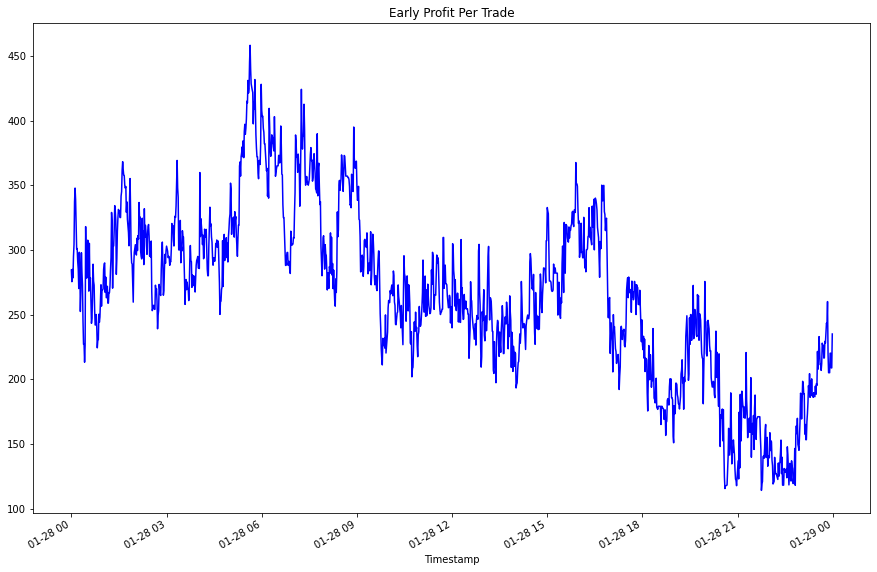

In [82]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    figsize=(15, 10), title="Early Profit Per Trade", color="blue")

<AxesSubplot:title={'center':'Middle Profit Per Trade'}, xlabel='Timestamp'>

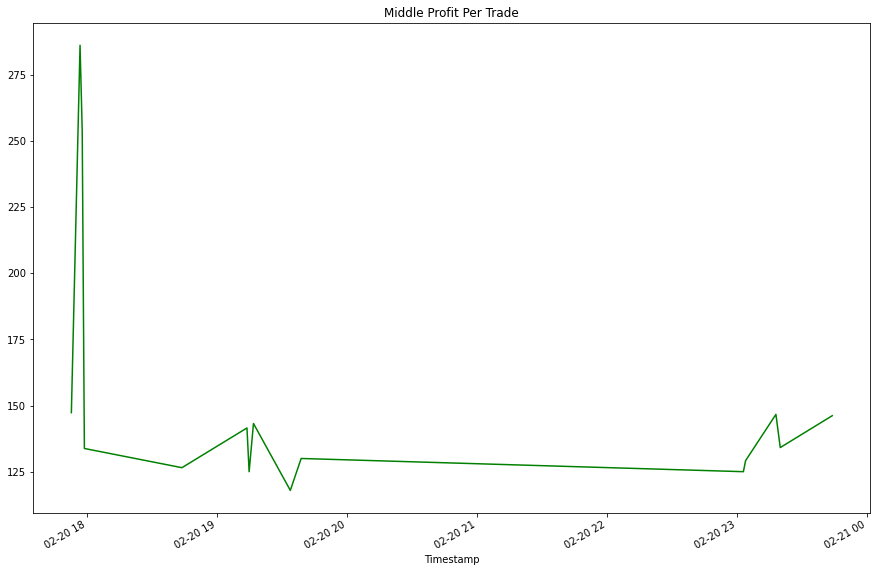

In [83]:
profit_per_trade_middle.plot(
    figsize=(15, 10), title="Middle Profit Per Trade", color="green")

<AxesSubplot:title={'center':'Late Profit Per Trade'}, xlabel='Timestamp'>

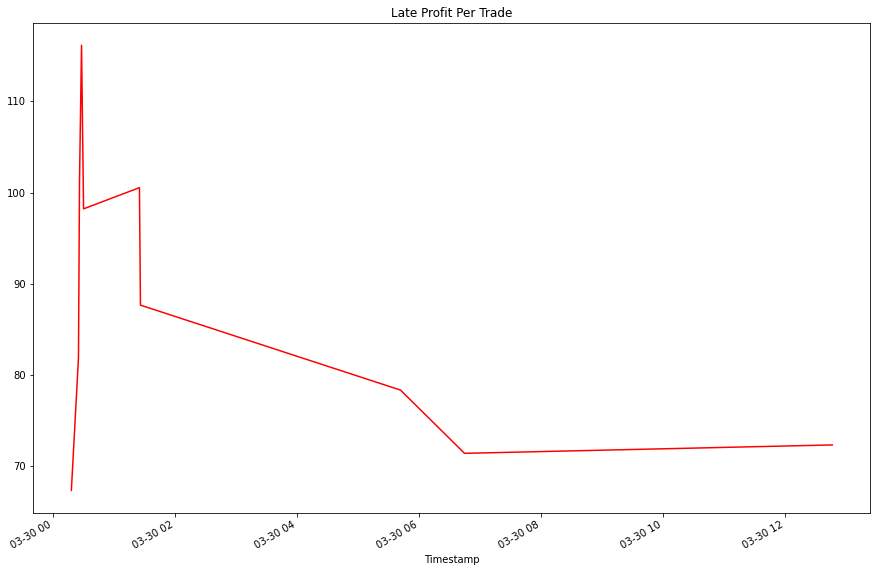

In [84]:
profit_per_trade_late.plot(
    figsize=(15, 10), title="Late Profit Per Trade", color="red")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [85]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
display(profit_per_trade_early.sum())
display(profit_per_trade_middle.sum())
display(profit_per_trade_late.sum())

379304.87000000005

2286.620000000001

875.0500000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [93]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

display(cumulative_profit_early.head())
display(cumulative_profit_middle.head())
display(cumulative_profit_late.head())

Timestamp
2018-01-28 00:00:00     284.38
2018-01-28 00:01:00     559.77
2018-01-28 00:02:00     844.67
2018-01-28 00:03:00    1122.99
2018-01-28 00:04:00    1417.87
dtype: float64

Timestamp
2018-02-20 17:53:00    147.32
2018-02-20 17:57:00    433.48
2018-02-20 17:58:00    687.49
2018-02-20 17:59:00    821.27
2018-02-20 18:44:00    947.79
dtype: float64

Timestamp
2018-03-30 00:18:00     67.36
2018-03-30 00:25:00    149.26
2018-03-30 00:26:00    250.41
2018-03-30 00:28:00    366.54
2018-03-30 00:30:00    464.75
dtype: float64

<AxesSubplot:title={'center':'Early Cumulative Profit'}, xlabel='Timestamp'>

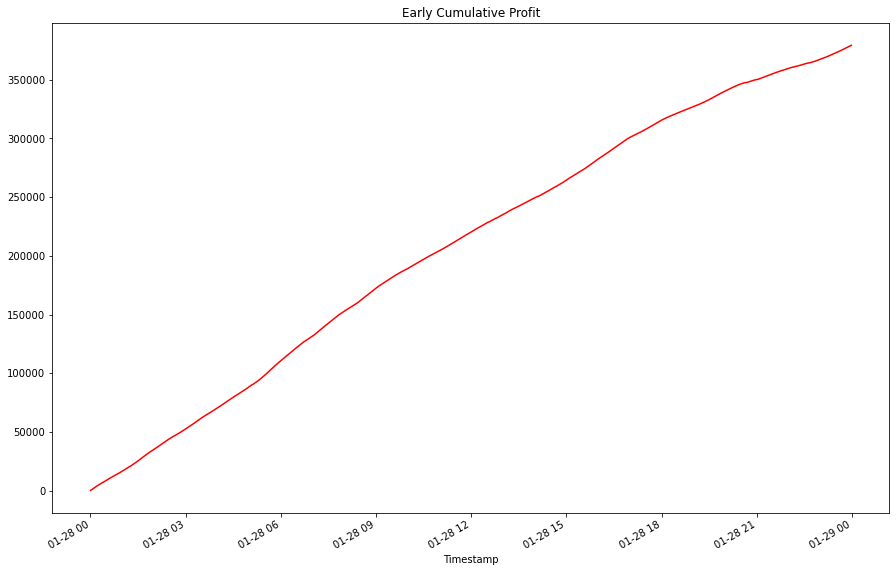

In [87]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 10), title="Early Cumulative Profit", color="red")


<AxesSubplot:title={'center':'Middle Cumulative Profit'}, xlabel='Timestamp'>

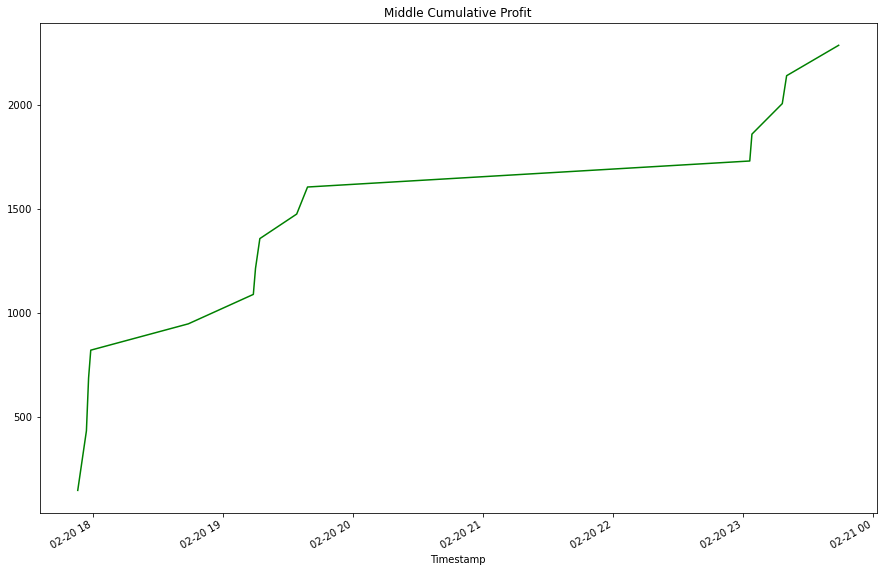

In [88]:
cumulative_profit_middle.plot(figsize=(15, 10), title="Middle Cumulative Profit", color="green")

<AxesSubplot:title={'center':'Late Cumulative Profit'}, xlabel='Timestamp'>

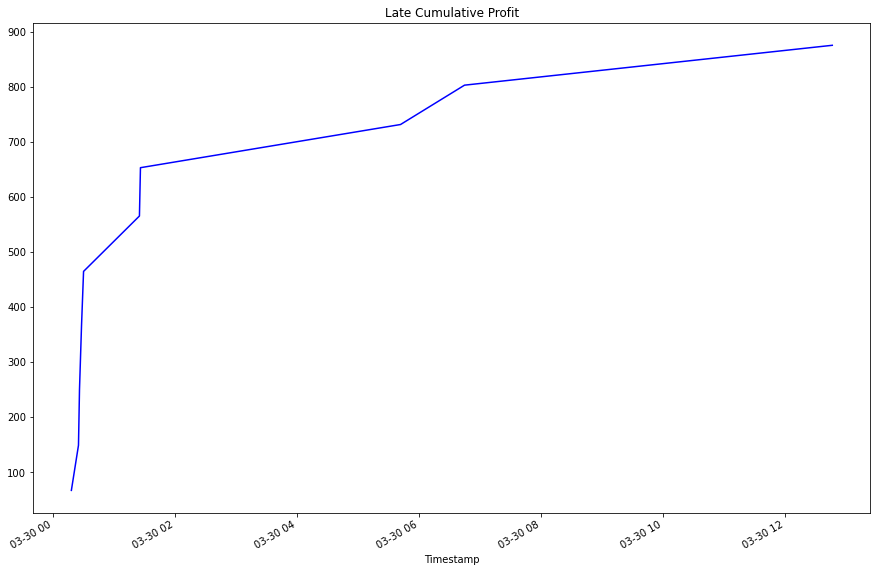

In [89]:
cumulative_profit_late.plot(figsize=(15, 10), title="Late Cumulative Profit", color="blue")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After reviewing the profit information across each date from the three different time periods, I identified a trend that there were a lot more arbitrage opportunities in the beginning and less in the end. Looking at the data, you could have made 379,304.87 dollars in one day in January compared to 2286.62 dollars in one day in February and compared to 875.05 dollars in March. When choosing the dates, I tried to pick a date where the most arbitrage opportunities were avialable so that it would be a fair comparison. In addition, when looking at the standard deviations (SD) for the profit per trade for each date, the SD was highest in January (65.88), decreasing in February (48.99), and lowest in March (15.98).  

As more people were taking advantage of the cryptocurrency arbitrage opportunities, it became more normalized. The prices grew closer and closer together and fewer opportunities were present as time progressed. 